# Workshop 7: Monte Carlo techniques

**Submit this notebook to bCourses to receive a grade for this Workshop.**

Please complete workshop activities in code cells in this iPython notebook. The activities titled **Practice** are purely for you to explore Python. Some of them may have some code written, and you should try to modify it in different ways to understand how it works. Although no particular output is expected at submission time, it is _highly_ recommended that you read and work through the practice activities before or alongside the exercises. However, the activities titled **Exercise** have specific tasks and specific outputs expected. Include comments in your code when necessary.  Enter your name in the cell at the top of the notebook. 

**The workshop should be submitted on bCourses under the Assignments tab (both the .ipynb and .pdf files).**

In [3]:
# standard preamble
import numpy as np
import scipy as sp      
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

So far, you have seen the following functions for drawing random numbers from various distributions:

    np.random.rand()
    np.random.randint()
    np.random.uniform()
    np.random.standard_normal()
    np.random.exponential()
    np.random.binomial()
    np.random.poisson()
    
See examples in `Lecture07.ipynb` and the material from last two workshops. Now let's see how to sample probability distributions for which a function may not already exist.

## Exercise 1: Generating an arbitrary distribution

A problem that is frequently encountered is one of sampling one distribution but only having direct access to sampling another distribution (often the uniform distribution). As an example, we will try out one way to draw numbers from a Gaussian distribution starting with numbers drawn only from a uniform distribution. As it turns out, there are multiple ways of doing this. This particular method is known as the ["Box-Muller transform"](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform).

1. Starting from a uniform random number distribution (`numpy.random.rand()`), generate 10,000 Gaussian-distributed random numbers using inverse transform method:
    1. Generate a pair of uniform-distributed numbers $u_1\in[0..1]$ and $u_2\in[0..1]$
    1. Compute $z_1=\sin(2\pi u_1)\sqrt{-2\ln u_2}$ and $z_2=\cos(2\pi u_1)\sqrt{-2\ln u_2}$
1. Make histograms of $z_1$ and $z_2$.
1. Make a scatter plot of $z_2$ vs $z_1$. 
1. Do the random variables $z_2$ and $z_1$ appear to follow a Gaussian distribution?

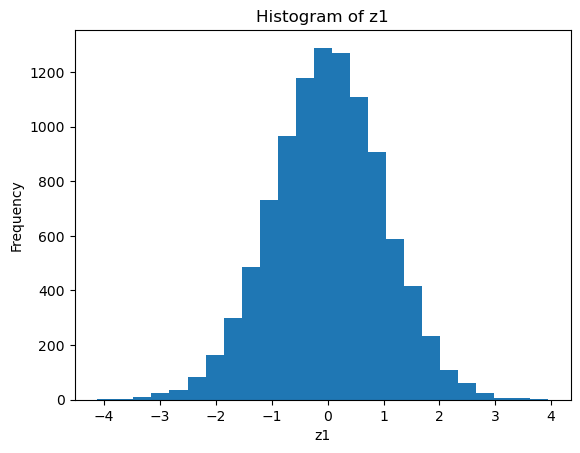

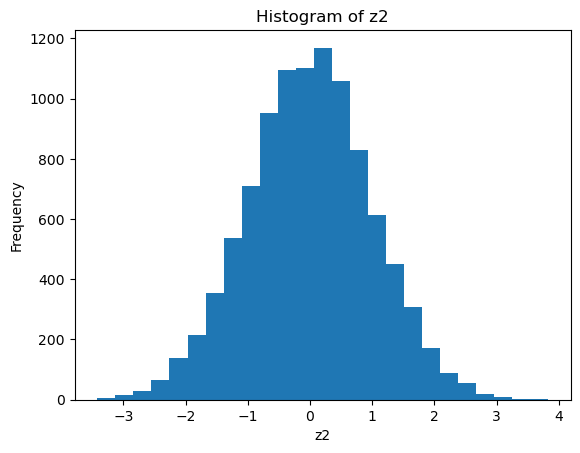

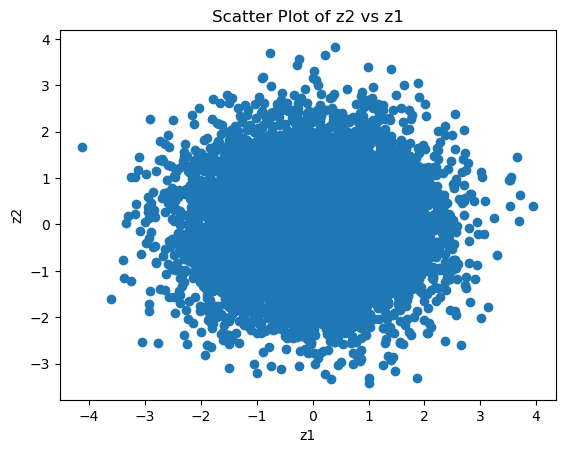

The random variables 𝑧2 and 𝑧1 appear to follow a Gaussian distribution.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Remember numpy has all the math function you need: np.sin, np.cos, np.sqrt, np.log
u1 = np.random.rand(10000)
u2 = np.random.rand(10000)
z1 = np.sin(2*np.pi*u1) * np.sqrt(-2*np.log(u2))
z2 = np.cos(2*np.pi*u1) * np.sqrt(-2*np.log(u2))

#histograms of 𝑧1
plt.hist(z1, bins=25)
plt.xlabel('z1')
plt.ylabel('Frequency')
plt.title('Histogram of z1')
plt.show()

#histograms of 𝑧2
plt.hist(z2, bins=25)
plt.xlabel('z2')
plt.ylabel('Frequency')
plt.title('Histogram of z2')
plt.show()

plt.scatter(z1, z2)
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Scatter Plot of z2 vs z1')
plt.show()

print('The random variables 𝑧2 and 𝑧1 appear to follow a Gaussian distribution.')

(Optional) If you want to get ahead for the next homework assignment, try using `scipy.stats.norm.fit()` to fit the $z_1$ and/or $z_2$ distributions.  This function will return the best-fit values for $\mu$ and $\sigma$ (which should be about 0 and 1, respectively).

In [5]:
from scipy.stats import norm

# If you'd like, fit the z1 and/or z2 distribution using norm.fit()

## Exercise 2: Integration by accept-reject Monte Carlo method

The "accept-reject" method is another way of simulating drawing from one probability distribution starting from sampling a uniform distribution. Here we explore this technique for finding the area under curves using random numbers. Although in this exercise we will only use it to estimate the value of $\pi$, you can use it for more sophisticated problems.

Before we start coding, let us just look at a quarter circle inscribed inside a square of dimensions 1 by 1.

<img src="quarter_circle.png">

If we were to throw a dart randomly, with uniform probability, into the square, what is the probability it would land in the shaded region under the curve? It should be the ratio of the shaded area to the area of the entire square.

$$P(\text{dart under curve}) = \frac{A_\text{curve}}{A_\text{square}}$$
$$A_\text{curve} = \frac{1}{4}\pi \times 1^2$$
$$A_\text{square} = 1 \times 1$$
$$P(\text{dart under curve}) = \frac{\pi}{4}$$

We also know that if we were to throw a very large number of darts, the fraction of them that land in the shaded region would approach the value of $P(\text{dart under curve})$ found above. Therefore, if we can simulate throwing these darts and checking whether they landed inside the shaded region or outside the shaded region, we can estimate the area of the shaded region. In this case, the area of the shaded region is proportional to $\pi$, so we can then use that area to estimate $\pi$.

This technique of randomly generating points and checking whether they are under the curve or above the curve is referred to as $\textit{Monte Carlo integration}$.
Compute the value of $\pi$ using Monte Carlo method. 

1. Implement the Monte Carlo accept-reject method for computing $\pi$
1. For a given number of events $N$ you use in the calculation, compute
    1. The estimate of $\pi$
    1. The estimated precision of the value $\pi$
1. Plot the difference between estimated and true value of $\pi$ as a function of the number of events $N$ and compare that difference to the uncertainty you estimated

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Don't use np.pi until you are comparing your estimate to the true value

num = 100000
inside = 0

for i in range(num):
    x = np.random.uniform(0, 1)
    y = np.random.uniform(0, 1)
    if x**2 + y**2 <= 1:
        inside += 1

estimated_pi = 4 * inside / num
print("Estimated value of 𝜋:", estimated_pi)

Estimated value of 𝜋: 3.14056


/tmp/ipykernel_194/1814905800.py:10: RuntimeWarning: invalid value encountered in sqrt
  estimated_precision = np.sqrt(estimated_variance)


N = 10: pi = 3.200000, precision = 0.149666
N = 50: pi = 3.168000, precision = 0.042633
N = 100: pi = 3.168000, precision = 0.047933
N = 500: pi = 3.141600, precision = 0.012601
N = 1000: pi = 3.169200, precision = 0.017084
N = 5000: pi = 3.140960, precision = 0.006632
N = 10000: pi = 3.140520, precision = 0.007012
N = 50000: pi = 3.140440, precision = 0.003113
N = 100000: pi = 3.143448, precision = 0.001866


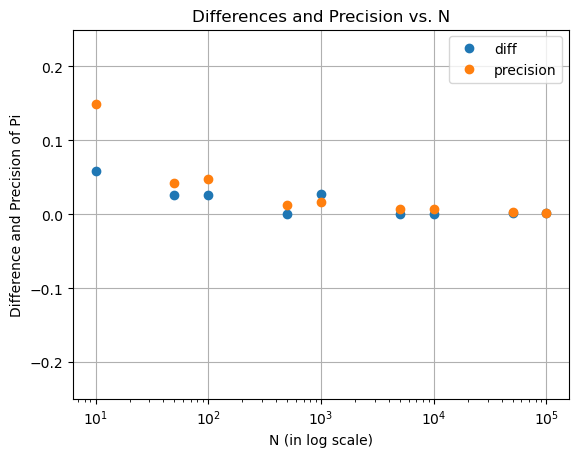

In [14]:
def monte_carlo_pi(N):
    inside = 0
    for i in range(N):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        if np.sqrt(x*x + y*y) <= 1:
            inside += 1
    estimated_pi = 4 * inside / N
    estimated_variance = estimated_pi * (1 - estimated_pi) / N
    estimated_precision = np.sqrt(estimated_variance)
    return estimated_pi, estimated_precision

events_N = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
#events_N = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
estimated_pi_list = []
estimated_precision_list = []
for N in events_N:
    pi_list = []
    for i in range(10): # repeat the experiment 100 times to calculate SEM
        pi, _ = monte_carlo_pi(N)
        pi_list.append(pi)
    sem = np.std(pi_list) / np.sqrt(len(pi_list))
    estimated_pi = np.mean(pi_list)
    estimated_pi_list.append(estimated_pi)
    estimated_precision_list.append(sem)
    print("N = {0:d}: pi = {1:.6f}, precision = {2:.6f}".format(N, estimated_pi, sem))

true_pi = np.pi

difference_list = np.abs(np.array(estimated_pi_list) - true_pi)
plt.plot(events_N, difference_list, 'o', label = 'diff')
plt.plot(events_N, estimated_precision_list, 'o', label = 'precision')
plt.xscale('log')
plt.xlabel('N (in log scale)')
plt.ylabel('Difference and Precision of Pi')
plt.legend()
plt.ylim(-0.25, 0.25)
plt.grid(True)
plt.title('Differences and Precision vs. N')
plt.show()
